In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import collections

In [2]:
df = pd.read_excel('/content/drive/MyDrive/personal projects/phone_call.xlsx')

In [3]:
df.head(10)

,Name,Phone Number,Time,Duration,Type
0,Jj,8801882650496,17:58 19-02-2022,00:00:00,Dialed
1,8801752095828,8801752095828,19:21 18-02-2022,00:02:35.002000,Received
2,YAsh,8801874877234,19:18 18-02-2022,00:00:00,Missed
3,YAsh,8801874877234,19:17 18-02-2022,00:00:00,Missed
4,YAsh,8801874877234,19:09 18-02-2022,00:00:00,Rejected
5,YAsh,8801874877234,19:08 18-02-2022,00:00:05.011000,Dialed
6,Yeasin Doct,8801860123496,19:03 18-02-2022,00:02:45.974000,Dialed
7,halim iiuc cse,1754774842,18:00 18-02-2022,00:00:00,Dialed
8,halim iiuc2,8801625224097,17:59 18-02-2022,00:00:00,Dialed
9,dhon rakib,8801856140538,17:57 18-02-2022,00:00:31.968000,Dialed


In [4]:
df.shape

(1423, 5)

In [5]:
df.isnull().sum()

Name            0
Phone Number    0
Time            0
Duration        0
Type            0
dtype: int64

In [6]:
df.fillna(value='0', inplace=True)

In [7]:
df.isnull().sum()

Name            0
Phone Number    0
Time            0
Duration        0
Type            0
dtype: int64

In [8]:
time_date = df['Time']

In [9]:
time_date[1]

'19:21 18-02-2022'

In [10]:
type(time_date)

pandas.core.series.Series

In [11]:
len(time_date[1])

16

In [12]:
def time(ti_me):
  return ti_me[:5]
def date(ti_me):
  return ti_me[6:]

In [13]:
df['time'] = df['Time'].apply(lambda x: time(x))
df['date'] = df['Time'].apply(lambda x: date(x))

In [14]:
df.head(20)

,Name,Phone Number,Time,Duration,Type,time,date
0,Jj,8801882650496,17:58 19-02-2022,00:00:00,Dialed,17:58,19-02-2022
1,8801752095828,8801752095828,19:21 18-02-2022,00:02:35.002000,Received,19:21,18-02-2022
2,YAsh,8801874877234,19:18 18-02-2022,00:00:00,Missed,19:18,18-02-2022
3,YAsh,8801874877234,19:17 18-02-2022,00:00:00,Missed,19:17,18-02-2022
4,YAsh,8801874877234,19:09 18-02-2022,00:00:00,Rejected,19:09,18-02-2022
5,YAsh,8801874877234,19:08 18-02-2022,00:00:05.011000,Dialed,19:08,18-02-2022
6,Yeasin Doct,8801860123496,19:03 18-02-2022,00:02:45.974000,Dialed,19:03,18-02-2022
7,halim iiuc cse,1754774842,18:00 18-02-2022,00:00:00,Dialed,18:00,18-02-2022
8,halim iiuc2,8801625224097,17:59 18-02-2022,00:00:00,Dialed,17:59,18-02-2022
9,dhon rakib,8801856140538,17:57 18-02-2022,00:00:31.968000,Dialed,17:57,18-02-2022


In [15]:
def dueration(due):
  temp = str(due)
  return temp[:8]

In [16]:
df['duration'] = df['Duration'].apply(lambda x: dueration(x))

In [17]:
df.head(25)

,Name,Phone Number,Time,Duration,Type,time,date,duration
0,Jj,8801882650496,17:58 19-02-2022,00:00:00,Dialed,17:58,19-02-2022,00:00:00
1,8801752095828,8801752095828,19:21 18-02-2022,00:02:35.002000,Received,19:21,18-02-2022,00:02:35
2,YAsh,8801874877234,19:18 18-02-2022,00:00:00,Missed,19:18,18-02-2022,00:00:00
3,YAsh,8801874877234,19:17 18-02-2022,00:00:00,Missed,19:17,18-02-2022,00:00:00
4,YAsh,8801874877234,19:09 18-02-2022,00:00:00,Rejected,19:09,18-02-2022,00:00:00
5,YAsh,8801874877234,19:08 18-02-2022,00:00:05.011000,Dialed,19:08,18-02-2022,00:00:05
6,Yeasin Doct,8801860123496,19:03 18-02-2022,00:02:45.974000,Dialed,19:03,18-02-2022,00:02:45
7,halim iiuc cse,1754774842,18:00 18-02-2022,00:00:00,Dialed,18:00,18-02-2022,00:00:00
8,halim iiuc2,8801625224097,17:59 18-02-2022,00:00:00,Dialed,17:59,18-02-2022,00:00:00
9,dhon rakib,8801856140538,17:57 18-02-2022,00:00:31.968000,Dialed,17:57,18-02-2022,00:00:31


***Name***

In [18]:
most_call = df['Name'].tolist()

In [19]:
max(most_call,key=most_call.count)

'Prime Hospital For Serial'

In [20]:
x = Counter(most_call)

In [21]:
y = x.most_common(5)

In [22]:
y = dict(y)

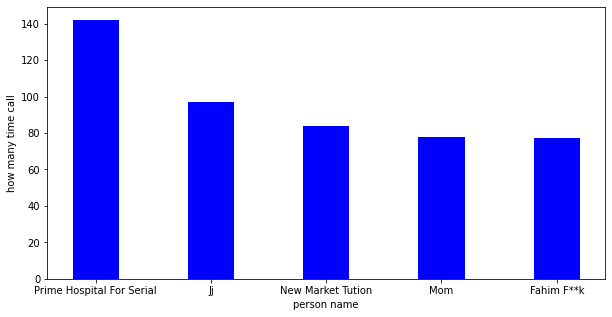

In [23]:
fig = plt.figure(figsize = (10, 5))

person_name = list(y.keys())
how_many_time_call = list(y.values())

plt.bar(person_name, how_many_time_call, color ='blue',
        width = 0.4)

plt.xlabel("person name")
plt.ylabel("how many time call")

plt.show()

In [24]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

In [25]:
# def valuelabel(person_name,how_many_time_call):
#     for i in range(len(person_name)):
#         plt.text(i,how_many_time_call[i],how_many_time_call[i], ha = 'center',
#                  bbox = dict(facecolor = 'cyan', alpha =0.8))

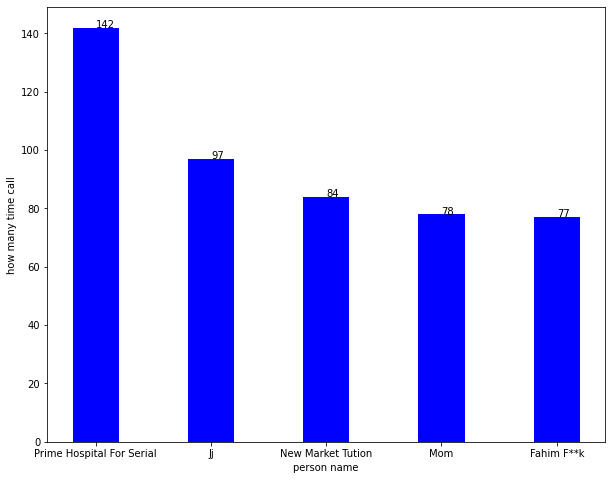

In [26]:
fig = plt.figure(figsize = (10, 8))

person_name = list(y.keys())
how_many_time_call = list(y.values())

plt.bar(person_name, how_many_time_call, color ='blue',
        width = 0.4)

addlabels(person_name, how_many_time_call)
#valuelabel(person_name,how_many_time_call)

plt.xlabel("person name")
plt.ylabel("how many time call")

plt.show()

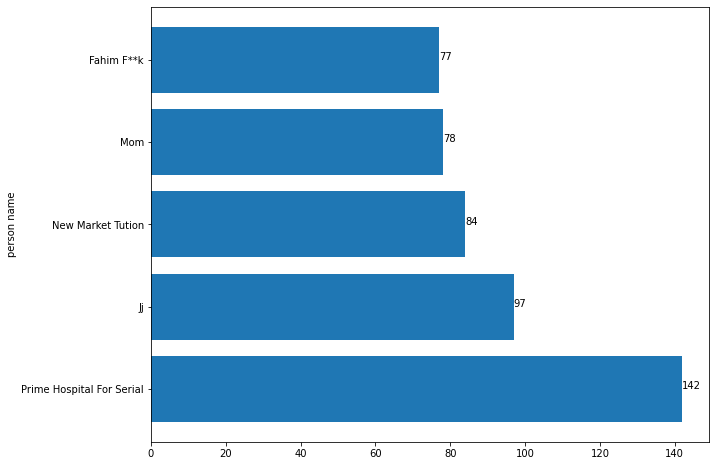

In [27]:
fig = plt.figure(figsize = (10, 8))

person_name = list(y.keys())
how_many_time_call = list(y.values())

plt.barh(person_name, how_many_time_call)

for index, value in enumerate(how_many_time_call):
  plt.text(value, index,
             str(value))
  
plt.ylabel("person name")

plt.show()

***Duration***

In [28]:
name = df['Name'].unique()
duration = df['Duration']

In [29]:
x = duration[1]

In [30]:
x.hour

0

In [31]:
def process(x):
  global hour, minute, second, mic_second
  hour = hour + x.hour
  minute = minute + x.minute
  second = second + x.second
  mic_second = mic_second + x.microsecond
  #print(mic_second)

In [32]:
xx = []

In [33]:
def convert(x, hour, minute, second, mic_second):
  global xx
  total_time = (mic_second * 1) + (second * 100000) + (minute * 60 * 100000) + (hour * 60 * 60 * 100000)


  xx.append(total_time)


  # total_MS = int(mic_second / 100000)
  # reminder_MS = mic_second % 100000

  # total_S = int((total_MS + second) / 60)
  # reminder_S = (total_MS + second) % 60

  # total_M = int((total_S + minute) / 60)
  # reminder_M = (total_S + minute) % 60

  # total_H = int((total_M + hour) / 24)
  # reminder_H = (total_M + hour) % 24

  # total_D = total_H

  #return ( total_D, reminder_H, reminder_M, reminder_S, reminder_MS)

In [34]:

for x in name:
  hour = 0
  minute = 0
  second = 0
  mic_second = 0
  for i,y in enumerate(duration):
    if x == df['Name'][i]:
      process(y)
  #print (x,' -> ',hour,':',minute,':',second,':',mic_second)
  convert(x, hour, minute, second, mic_second)

In [35]:
xy = dict(zip(name,xx))

In [36]:
xy

{'*111*611': 0,
 '*551': 0,
 '+880 1521-401218': 59767000,
 16328: 0,
 1705427835: 2995000,
 1711701719: 8258000,
 1712180522: 0,
 1726821677: 20714000,
 1727658118: 1721000,
 1744656132: 13795000,
 1745093464: 0,
 1755513950: 21226000,
 1762276423: 41429000,
 1768674457: 8395000,
 1788577711: 0,
 1811812113: 2671000,
 1812346423: 5162000,
 1813176838: 0,
 1814130112: 2743000,
 1814942219: 9468000,
 1816035639: 4579000,
 1816452588: 3629000,
 1816555427: 2995000,
 1817071599: 4702000,
 1817526961: 2930000,
 1818136474: 20916000,
 1821153110: 20405000,
 1825175666: 4327000,
 1826361038: 2606000,
 1832223310: 0,
 1837184801: 0,
 1840029766: 18252000,
 1858331201: 36374000,
 1859422454: 0,
 18744: 0,
 1876304354: 58090000,
 1880960902: 4464000,
 1914097291: 22176000,
 1915558635: 0,
 1960279300: 5465000,
 196852213: 2743000,
 22020: 0,
 22788: 0,
 28466: 0,
 765836: 0,
 8801301413732: 9605000,
 8801521225856: 69855000,
 8801580487037: 14429000,
 8801580830730: 13421000,
 8801610627080: 31

In [37]:
z = dict(sorted(Counter(xy).most_common(5)))

In [38]:
z

{'Dad': 248134000,
 'Fahim F**k': 285877000,
 'Jj': 321887000,
 'Mom': 329781000,
 'dad 2': 596471000}

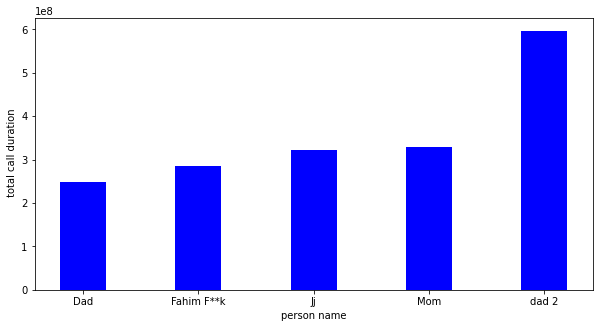

In [39]:
fig = plt.figure(figsize = (10, 5))

person_name = list(z.keys())
call_duration = list(z.values())

plt.bar(person_name, call_duration, color ='blue',
        width = 0.4)

plt.xlabel("person name")
plt.ylabel(" total call duration")

plt.show()

In [40]:
import time

In [41]:
def addlabels(x,y):
    for i in range(len(x)):
      a = y[i]
      #a = (time.strftime('%H:%M:%S', time.gmtime(a)))
      plt.text(i,y[i],a)

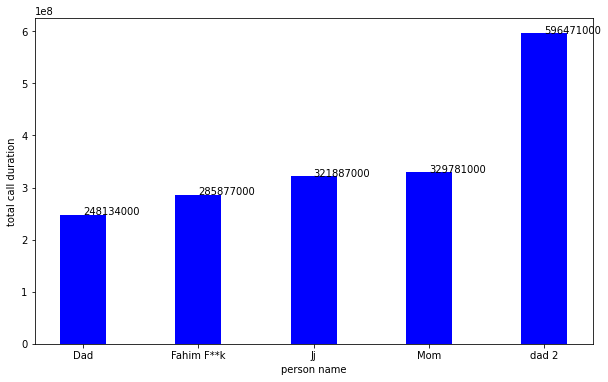

In [42]:
fig = plt.figure(figsize = (10, 6))

person_name = list(z.keys())
call_duration = list(z.values())

plt.bar(person_name, call_duration, color ='blue',
        width = 0.4)

addlabels(person_name, call_duration)
#valuelabel(person_name,how_many_time_call)

plt.xlabel("person name")
plt.ylabel("total call duration")

plt.show()

***call history***

In [43]:
import datetime

In [44]:
ty_pe = df['Type']

In [45]:
print(type(ty_pe[1]))

<class 'str'>


In [46]:
dialed = 0
received = 0
missed = 0
rejected = 0

In [47]:
for x in ty_pe:
  if x == 'Dialed':
    dialed += 1
  if x == 'Received':
    received += 1
  if x == 'Missed':
    missed += 1
  if x == 'Rejected':
    rejected += 1
    

In [48]:
call_type = list(ty_pe.unique())
 
data = [dialed, received, missed, rejected]

In [49]:
explode = (0.1, 0.0, 0.2, 0.3)

In [50]:
colors = ( "green", "yellow", "violet",
          "red")

In [51]:
wp = { 'linewidth' : 1, 'edgecolor' : "black" }

In [52]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

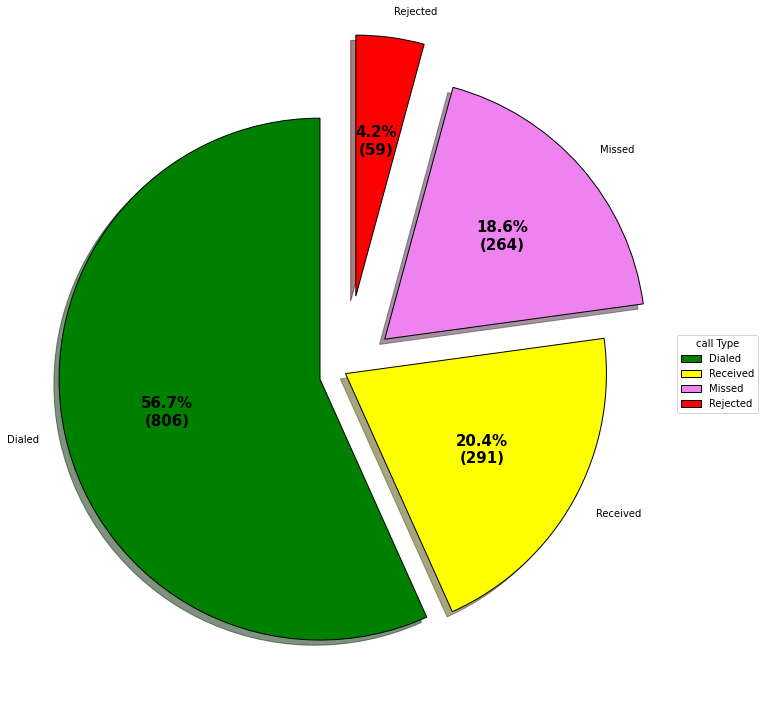

In [53]:
fig, ax = plt.subplots(figsize =(15, 12))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = call_type,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))

ax.legend(wedges, call_type,
          title ="call Type",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 15, weight ="bold")

plt.show()

In [54]:
ty_pe
duration

0              00:00:00
1       00:02:35.002000
2              00:00:00
3              00:00:00
4              00:00:00
             ...       
1418    00:00:08.035000
1419    00:00:17.021000
1420    00:00:26.006000
1421    00:00:17.021000
1422    00:00:31.968000
Name: Duration, Length: 1423, dtype: object

In [55]:
df.head(25)

,Name,Phone Number,Time,Duration,Type,time,date,duration
0,Jj,8801882650496,17:58 19-02-2022,00:00:00,Dialed,17:58,19-02-2022,00:00:00
1,8801752095828,8801752095828,19:21 18-02-2022,00:02:35.002000,Received,19:21,18-02-2022,00:02:35
2,YAsh,8801874877234,19:18 18-02-2022,00:00:00,Missed,19:18,18-02-2022,00:00:00
3,YAsh,8801874877234,19:17 18-02-2022,00:00:00,Missed,19:17,18-02-2022,00:00:00
4,YAsh,8801874877234,19:09 18-02-2022,00:00:00,Rejected,19:09,18-02-2022,00:00:00
5,YAsh,8801874877234,19:08 18-02-2022,00:00:05.011000,Dialed,19:08,18-02-2022,00:00:05
6,Yeasin Doct,8801860123496,19:03 18-02-2022,00:02:45.974000,Dialed,19:03,18-02-2022,00:02:45
7,halim iiuc cse,1754774842,18:00 18-02-2022,00:00:00,Dialed,18:00,18-02-2022,00:00:00
8,halim iiuc2,8801625224097,17:59 18-02-2022,00:00:00,Dialed,17:59,18-02-2022,00:00:00
9,dhon rakib,8801856140538,17:57 18-02-2022,00:00:31.968000,Dialed,17:57,18-02-2022,00:00:31


In [56]:
dialed_duration = 0
received_duration = 0
missed_duration = 0
rejected_duration = 0

In [57]:
for i,x in enumerate(ty_pe):
  if x == 'Dialed':
    dialed_duration =+ dialed_duration + (int(duration[i].strftime("%H%M%S%f")))

  if x == 'Received':
    received_duration =+ received_duration + (int(duration[i].strftime("%H%M%S%f")))

  if x == 'Missed':
    missed_duration =+ missed_duration + (int(duration[i].strftime("%H%M%S%f")))

  if x == 'Rejected':
    rejected_duration =+ rejected_duration + (int(duration[i].strftime("%H%M%S%f")))

In [58]:
import datetime
dialed_duration_ = (datetime.timedelta(milliseconds=dialed_duration/1000))

received_duration_ = (datetime.timedelta(milliseconds=received_duration/1000))

missed_duration_ = (datetime.timedelta(milliseconds=missed_duration/1000))

rejected_duration_ = (datetime.timedelta(milliseconds=rejected_duration/1000))

In [64]:
call_type = ['Dialed','Received']
 
data = [dialed_duration, received_duration]

In [67]:
explode = (0.1, 0.0)

colors = ( "green", "violet")

wp = { 'linewidth' : 1, 'edgecolor' : "black" }

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} ms)".format(pct, absolute)

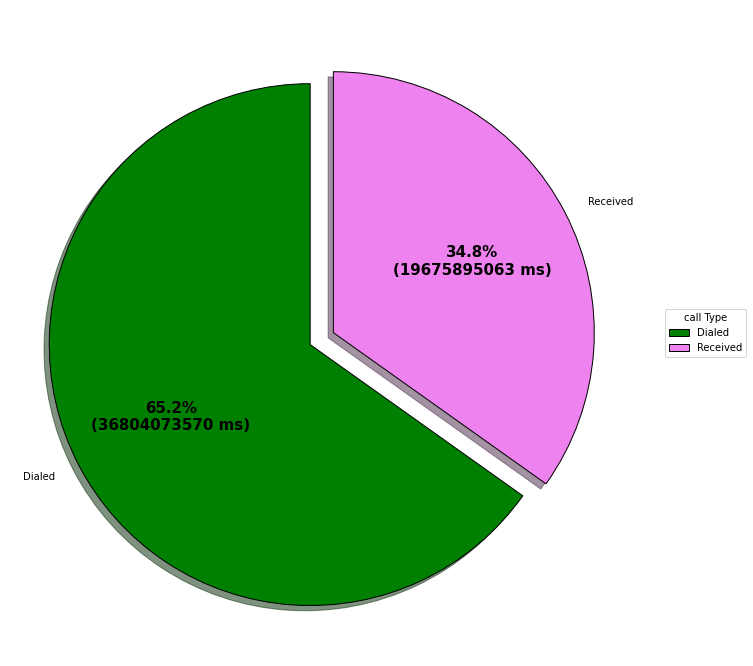

In [68]:
fig, ax = plt.subplots(figsize =(15, 12))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = call_type,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))

ax.legend(wedges, call_type,
          title ="call Type",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 15, weight ="bold")

plt.show()